# Written by Tiffany Patafio for HW 4 Assignment 2

Using CitiBike Data, come up with an analysis that can be performed as well as a hypothesis and NULL hypothesis.


In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


# Idea: 
Non-membership usage (likely driven by leasure bikers, tourists & visitors) is highest on weekends.

# Null Hypothesis: 
The average number of daily trips using 24 hour passes or 3 day passes on weekends (E) in NYC during August 2018 is the same or lower than the average amount on weekdays (D) during the same time period with a significance level of .10. (Weekends=Saturday and Sunday)

H0: E-D<=0

# Alternative Hypothesis: 
The average number of daily trips using 24 hour passes or 3 day passes on weekends (E) during August 2018 is significantly higher than the average amount on weekdays (D) during this same period.

H1: E-D>0

In [2]:
#Download NY Citywide Payroll data from URL and add to PUIDATA
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

### ***!!Uncomment below to download data!!!***

In [3]:
#Download data for August 2018
datestring = '201808'
#getCitiBikeCSV(datestring)

In [4]:
#read data from trip data csv file into dataframe
df=pd.read_csv(os.getenv("PUIDATA")+"/201808-citibike-tripdata.csv")

In [5]:
#review the data in the csv file
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


In [6]:
#add a date time attribute
df['date']=pd.to_datetime(df['starttime'])
df['day_of_week'] = df['date'].dt.weekday_name
df['shortdate']=df['date'].dt.strftime('%m/%d/%Y')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,day_of_week,shortdate
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01 00:00:07.321,Wednesday,08/01/2018
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01 00:00:19.748,Wednesday,08/01/2018
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01 00:00:21.175,Wednesday,08/01/2018
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01 00:00:26.470,Wednesday,08/01/2018
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01 00:00:30.291,Wednesday,08/01/2018


In [7]:
#create an additional column that indicates 'weekday' or 'weekend' called Weekend
conditions = [
    (df['day_of_week'] == 'Saturday'),
    (df['day_of_week'] == 'Sunday'),]
choices=['weekend', 'weekend']

In [8]:
df['weekend']=np.select(conditions, choices, default='weekday')

In [9]:
# review & remove unnecessary columns
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'day_of_week', 'shortdate', 'weekend'],
      dtype='object')

In [10]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,day_of_week,shortdate,weekend
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01 00:00:07.321,Wednesday,08/01/2018,weekday
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01 00:00:19.748,Wednesday,08/01/2018,weekday
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01 00:00:21.175,Wednesday,08/01/2018,weekday
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01 00:00:26.470,Wednesday,08/01/2018,weekday
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01 00:00:30.291,Wednesday,08/01/2018,weekday


In [11]:
#remove columns
Limit=df.drop(['start station id', 'start station name', 'start station latitude',
        'start station longitude', 'end station id', 'end station name', 'birth year', 'gender',
        'end station latitude', 'end station longitude'], axis=1 )

In [12]:
#limit data to subscribers
subscribers=Limit[Limit['usertype']=='Customer']

In [13]:
#confirm dataset looks accurate
subscribers[subscribers['day_of_week']=='Sunday']

,tripduration,starttime,stoptime,bikeid,usertype,date,day_of_week,shortdate,weekend
247326,1550,2018-08-05 00:00:13.7930,2018-08-05 00:26:04.4530,14910,Customer,2018-08-05 00:00:13.793,Sunday,08/05/2018,weekend
247328,2578,2018-08-05 00:00:19.8040,2018-08-05 00:43:18.5450,15737,Customer,2018-08-05 00:00:19.804,Sunday,08/05/2018,weekend
247337,1561,2018-08-05 00:00:45.8380,2018-08-05 00:26:47.5780,27627,Customer,2018-08-05 00:00:45.838,Sunday,08/05/2018,weekend
247342,1149,2018-08-05 00:01:15.1650,2018-08-05 00:20:25.0770,32269,Customer,2018-08-05 00:01:15.165,Sunday,08/05/2018,weekend
247346,157,2018-08-05 00:01:18.5670,2018-08-05 00:03:55.6620,17876,Customer,2018-08-05 00:01:18.567,Sunday,08/05/2018,weekend
247347,2617,2018-08-05 00:01:18.6490,2018-08-05 00:44:55.8190,20300,Customer,2018-08-05 00:01:18.649,Sunday,08/05/2018,weekend
247351,1749,2018-08-05 00:01:33.9130,2018-08-05 00:30:43.6260,32132,Customer,2018-08-05 00:01:33.913,Sunday,08/05/2018,weekend
247355,1100,2018-08-05 00:01:50.3910,2018-08-05 00:20:11.0830,20131,Customer,2018-08-05 00:01:50.391,Sunday,08/05/2018,weekend
247356,1086,2018-08-05 00:01:51.4870,2018-08-05 00:19:58.0630,20230,Customer,2018-08-05 00:01:51.487,Sunday,08/05/2018,weekend
247359,1642,2018-08-05 00:01:57.8360,2018-08-05 00:29:20.2600,29727,Customer,2018-08-05 00:01:57.836,Sunday,08/05/2018,weekend


In [14]:
#counting number of days in the month for weekends and weekdays
num_e=subscribers[subscribers['weekend']=="weekend"].shortdate.nunique()
num_d=subscribers[subscribers['weekend']=="weekday"].shortdate.nunique()

In [15]:
#creating new metrics to calculate the average daily trips
subscribers_e=subscribers[subscribers.weekend=='weekend'].groupby([subscribers.weekend]).count()
subscribers_d=subscribers[subscribers.weekend=='weekday'].groupby([subscribers.weekend]).count()
subscribers_enorm=subscribers_e/num_e
subscribers_dnorm=subscribers_d/num_d

Text(0.5,1,'Average Daily number of rides on Weekends vs Weekdays')

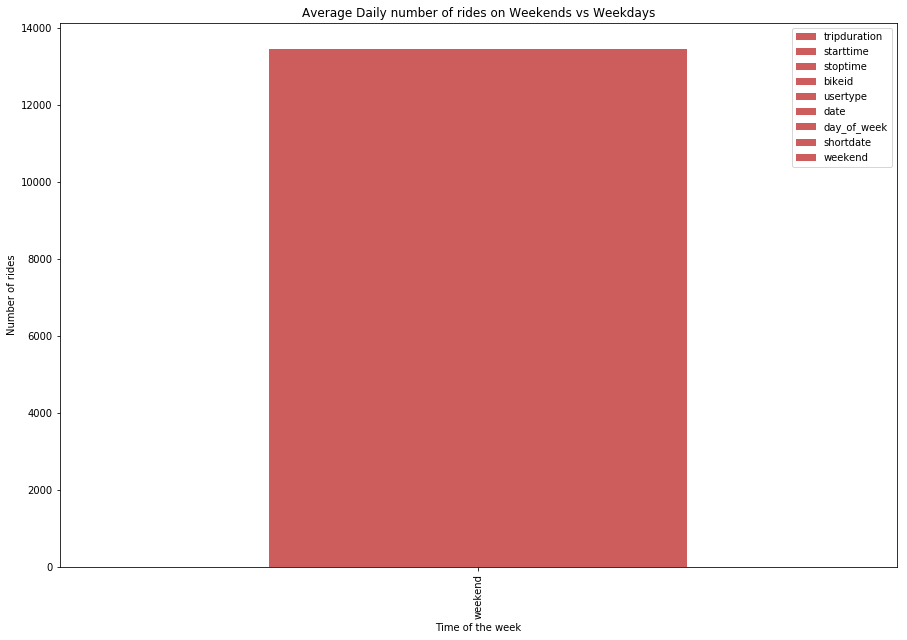

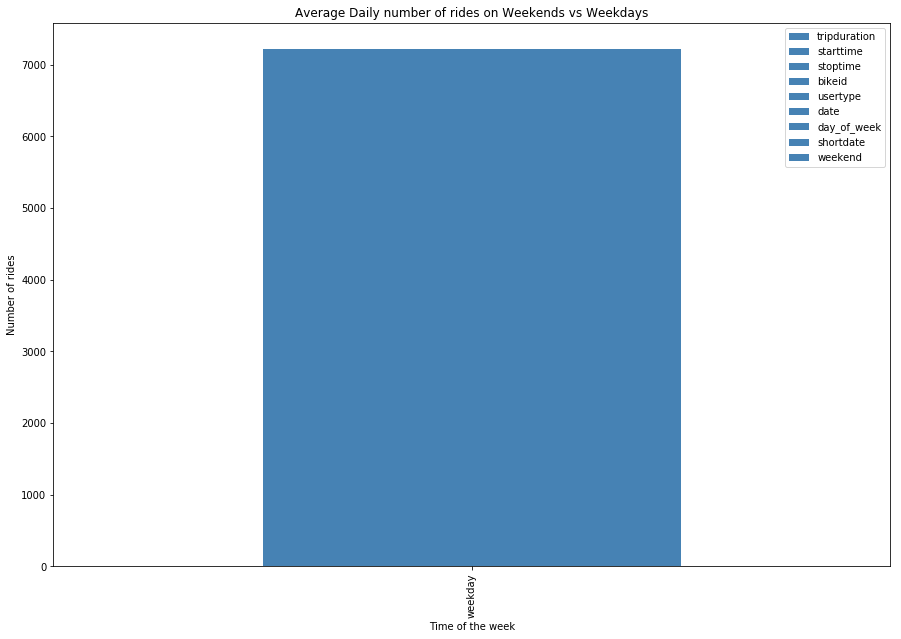

In [21]:
fig=pl.figure(figsize(15,10))
ax=subscribers_enorm.plot(kind="bar", color="IndianRed", label="Weekend")
ax1=subscribers_dnorm.plot(kind="bar", color="SteelBlue", label="Weekday")
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Time of the week")
ax.set_title ("Average Daily number of rides on Weekends vs Weekdays")
ax1.set_ylabel ("Number of rides")
ax1.set_xlabel ("Time of the week")
ax1.set_title ("Average Daily number of rides on Weekends vs Weekdays")

Figure 1: The figures above show the average number of daily trips for August 2018 for weekend days (red) and weekdays (blue). There is a consdirably higher number of daily trips (almost 14K) on weekends than weekdays (~7k).

Text(0.5,1,'Total Number of rides on Weekends vs Weekdays')

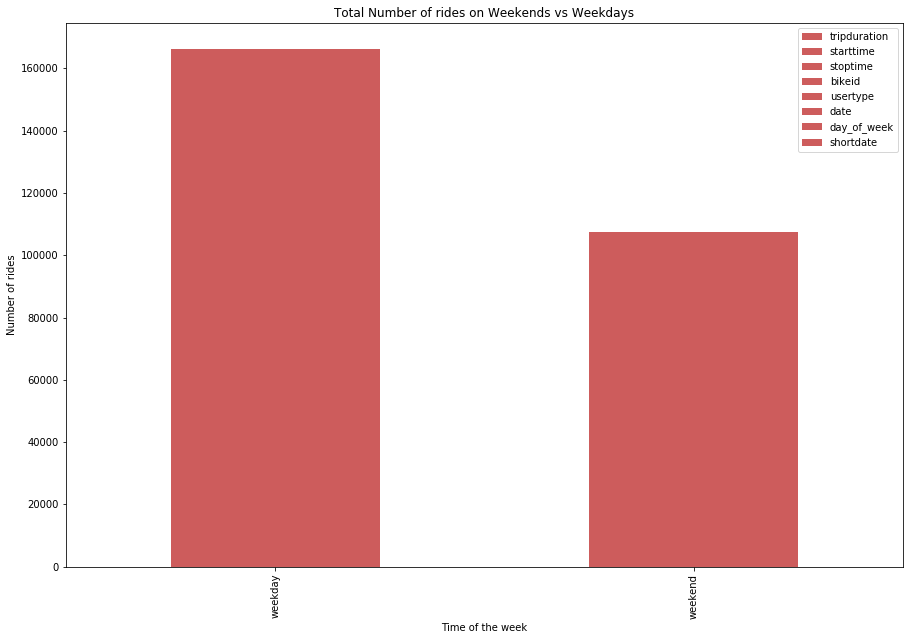

In [17]:
fig=pl.figure(figsize(15,10))
plot=subscribers.groupby([subscribers.weekend]).count().plot(kind="bar", color="IndianRed")
plot.set_ylabel ("Number of rides")
plot.set_xlabel ("Time of the week")
plot.set_title ("Total Number of rides on Weekends vs Weekdays")

Figure 2: The figure above shows the total number of subscriber rides in August 2018 separated by weekday and weekend. Note that there are 23 weekdays in August and only 8 weekends but number of trips on weekends is greater than half weekdays.